In [1]:
import pandas as pd

file_path = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'

df = pd.read_csv(file_path)

print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  num  
0   0     6    0  
1   3     3    2  
2   2     7    1  
3   0     3    0  
4   0     3    0  


Confusion Matrix & Classification Report

In [13]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv' 
df = pd.read_csv(data) 

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

x = df[["age" , "sex" , "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]] 
y = df["num"] 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)
scalar = StandardScaler() 
x_train_scalad = scalar.fit_transform(x_train) 
x_test_scaled = scalar.transform(x_test) 

model = LogisticRegression() 
model.fit(x_train_scalad, y_train) 
y_pred = model.predict(x_test_scaled) 

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

Confusion Matrix:
          Pred 0  Pred 1
Actual 0      46       3
Actual 1       8      33

Classification Report:
              precision    recall  f1-score    support
0              0.851852  0.938776  0.893204  49.000000
1              0.916667  0.804878  0.857143  41.000000
accuracy       0.877778  0.877778  0.877778   0.877778
macro avg      0.884259  0.871827  0.875173  90.000000
weighted avg   0.881379  0.877778  0.876776  90.000000


Best threshold & Best F1 

In [14]:
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv' 
df = pd.read_csv(data) 

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 )

x = df[["age" , "sex" , "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]] 
y = df["num"] 

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression() 
model.fit(x_train_scaled , y_train)

y_score = model.predict_proba(x_test_scaled)[:, 1]

best_threshold = 0 
best_f1 = 0 

for th in np.linspace(0,1,101):
    y_pred = (y_score >= th).astype(int)
    f1 = f1_score(y_test , y_pred) 
    if f1 > best_f1:
        best_f1 = f1 
        best_threshold = th 
        
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.4f}")


Best Threshold: 0.45
Best F1-score: 0.8889


Precision & Recall & arithmitic & F1-score  

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statistics import mean , harmonic_mean 
import pandas as pd

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_proba = model.predict_proba(x_test_scaled)[:, 1]

y_pred = (y_proba >= 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
arithmetic = mean([precision , recall])
try : 
    harmonic = harmonic_mean([precision , recall]) 
except : 
    harmonic = 0 
    
f1 = f1_score(y_test, y_pred)

print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"arithmitic : {arithmetic:.4f}") 
print(f"F1-score  : {f1:.4f}")

Precision : 0.9167
Recall    : 0.8049
arithmitic : 0.8608
F1-score  : 0.8571


   Threshold  Precision   Recall  F1-score
0       0.00   0.455556  1.00000  0.625954
1       0.01   0.455556  1.00000  0.625954
2       0.02   0.455556  1.00000  0.625954
3       0.03   0.465909  1.00000  0.635659
4       0.04   0.482353  1.00000  0.650794
5       0.05   0.493976  1.00000  0.661290
6       0.06   0.493827  0.97561  0.655738
7       0.07   0.519481  0.97561  0.677966
8       0.08   0.526316  0.97561  0.683761
9       0.09   0.563380  0.97561  0.714286

 Best Threshold : 
Threshold    0.450000
Precision    0.900000
Recall       0.878049
F1-score     0.888889
Name: 45, dtype: float64


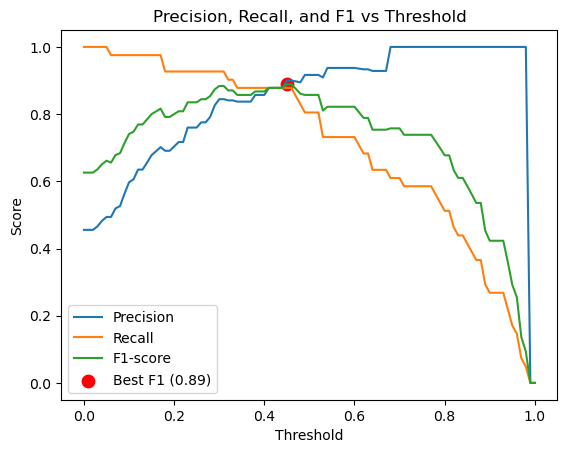

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_score = model.predict_proba(x_test_scaled)[:, 1]

thresholds = np.linspace(0, 1, 101)
results = []

for th in thresholds:
    y_pred = (y_score >= th).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    results.append([th, precision, recall, f1])

results_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1-score"])

print(results_df.head(10))

best_row = results_df.loc[results_df["F1-score"].idxmax()]
print("\n Best Threshold : ")
print(best_row)

import matplotlib.pyplot as plt

plt.plot(results_df["Threshold"], results_df["Precision"], label="Precision")
plt.plot(results_df["Threshold"], results_df["Recall"], label="Recall")
plt.plot(results_df["Threshold"], results_df["F1-score"], label="F1-score")

best_idx = results_df["F1-score"].idxmax()
best_threshold = results_df.loc[best_idx, "Threshold"]
best_f1 = results_df.loc[best_idx, "F1-score"]
plt.scatter(best_threshold, best_f1, color="red", s=80, label=f"Best F1 ({best_f1:.2f})")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Threshold")
plt.legend()
plt.show()



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        53
           1       0.69      0.65      0.67        37

    accuracy                           0.73        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.73      0.73      0.73        90


=== SVM Classifier ===
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        53
           1       0.70      0.62      0.66        37

    accuracy                           0.73        90
   macro avg       0.73      0.72      0.72        90
weighted avg       0.73      0.73      0.73        90



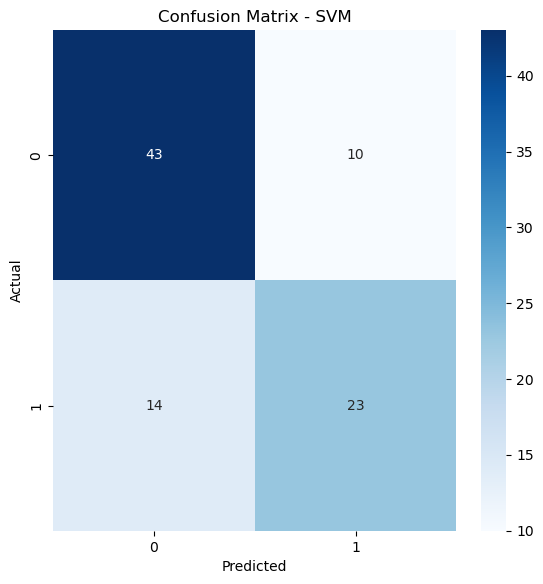

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv' 
df = pd.read_csv(data) 

# Binary target
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and labels
x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=47) 

# Scale
scaler = StandardScaler() 
x_train_scalar = scaler.fit_transform(x_train)
x_test_scalar = scaler.transform(x_test) 

# Logistic Regression
model = LogisticRegression() 
model.fit(x_train_scalar , y_train) 
y_pred_log = model.predict(x_test_scalar)

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))

# SVM Classifier
svc_classifier = SVC(kernel='poly')  
svc_classifier.fit(x_train_scalar, y_train)
y_pred_svc = svc_classifier.predict(x_test_scalar)

print("\n=== SVM Classifier ===")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix (SVM)
cm = confusion_matrix(y_test , y_pred_svc) 

plt.figure(figsize=(6.5 , 6.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix - SVM")
plt.show()


In [50]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score , f1_score 
import pandas as pd 

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv' 
df = pd.read_csv(data)  

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"] 

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 47)

models = {
    "Logistic Regression " : LogisticRegression(max_iter = 1000) , 
    "SVM" : SVC() , 
    "Random Forest " : RandomForestClassifier() , 
    "Decision Tree " : DecisionTreeClassifier() , 
    "KNN": KNeighborsClassifier() 
} 

results = [] 

for name , models in models.items() : 
    model.fit(x_train , y_train) 
    y_pred = model.predict(x_test) 
    acc = accuracy_score(y_test , y_pred) 
    f1 = f1_score(y_test , y_pred) 

    results.append({
        "Model" : name , 
        "Acc" : acc , 
        "F1 Score" : f1 
    }) 

results_df = pd.DataFrame(results).sort_values(by = "F1 Score" , ascending =False ) 
print(results_df) 


                  Model       Acc  F1 Score
0  Logistic Regression   0.677778  0.623377
1                   SVM  0.677778  0.623377
2        Random Forest   0.677778  0.623377
3        Decision Tree   0.677778  0.623377
4                   KNN  0.677778  0.623377


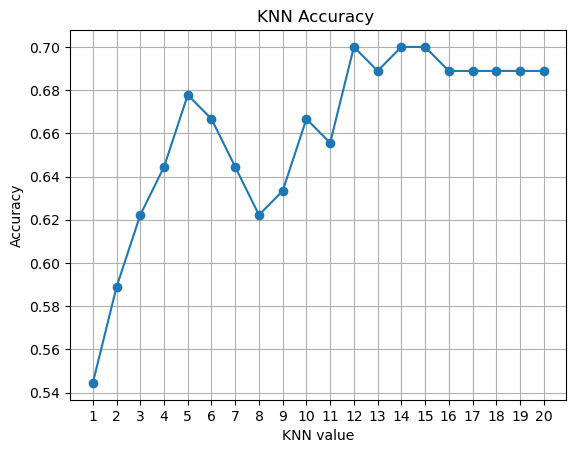

KNN best accuracy : 70.00%


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)


df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=47)


scorelist = []
for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)   
    KNclassifier.fit(x_train, y_train)
    scorelist.append(KNclassifier.score(x_test, y_test))


plt.plot(range(1, 21), scorelist, marker="o")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("KNN value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy ")
plt.grid(True)
plt.show()


KNacc = max(scorelist)
print("KNN best accuracy : {:.2f}%".format(KNacc * 100))


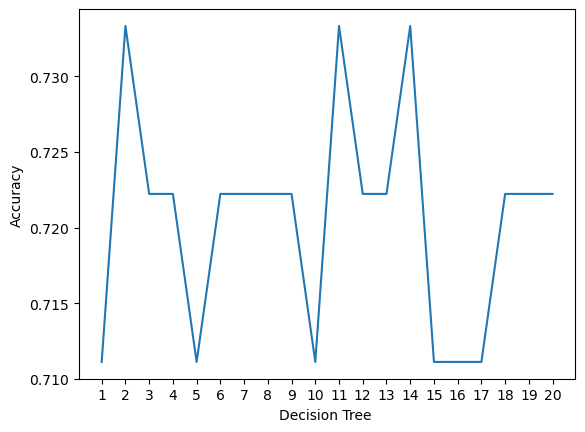

Decision Tree accuracy : 73.33%


In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split q
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data) 

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 
x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 47) 
scoreListDT = []

for i in range(1,21) : 
    dtclassifier = DecisionTreeClassifier() 
    dtclassifier.fit(x_train , y_train)
    scoreListDT.append(dtclassifier.score(x_test , y_test)) 

plt.plot(range(1,21) , scoreListDT)
plt.xticks(np.arange(1,21,1)) 
plt.xlabel("Decision Tree " )
plt.ylabel("Accuracy") 
plt.show() 

Dtacc = max(scoreListDT) 
print("Decision Tree accuracy : {:.2f}%".format(Dtacc*100)) 


   Depth  DecisionTree  RandomForest  GradientBoosting
0      1      0.688889      0.755556          0.744444
1      2      0.688889      0.755556          0.766667
2      3      0.766667      0.755556          0.766667
3      4      0.733333      0.755556          0.711111
4      5      0.722222      0.755556          0.766667
5      6      0.722222      0.744444          0.744444
6      7      0.711111      0.766667          0.733333
7      8      0.711111      0.777778          0.700000
8      9      0.711111      0.755556          0.711111
9     10      0.711111      0.755556          0.711111


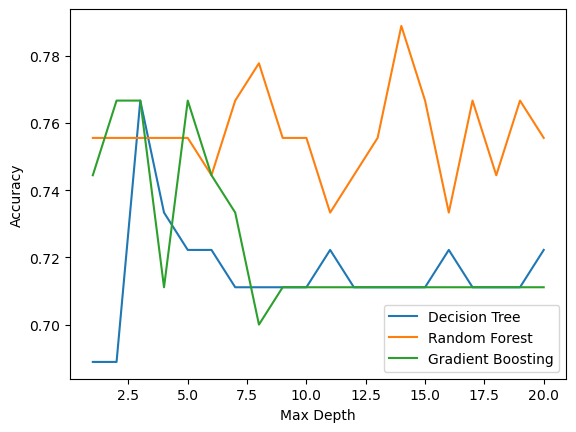

In [66]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data) 
df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 47) 

scoreListDT = [] 
scoreRF = [] 
scoreG = [] 
results = []

depth = range(1,21)

# Decision Tree
for i in depth : 
    dtclassifier = DecisionTreeClassifier(max_depth=i) 
    dtclassifier.fit(x_train , y_train)
    scoreListDT.append(dtclassifier.score(x_test , y_test)) 

# Random Forest
for d in depth : 
    Rfclassifier = RandomForestClassifier(max_depth=d)
    Rfclassifier.fit(x_train , y_train) 
    scoreRF.append(Rfclassifier.score(x_test , y_test)) 

for g in depth : 
    Gclassifier = GradientBoostingClassifier(max_depth=g) 
    Gclassifier.fit(x_train , y_train) 
    scoreG.append(Gclassifier.score(x_test , y_test)) 

results_df = pd.DataFrame({
    "Depth": depth,
    "DecisionTree": scoreListDT,
    "RandomForest": scoreRF,
    "GradientBoosting": scoreG
})

print(results_df.head(10))

plt.plot(results_df["Depth"], results_df["DecisionTree"], label="Decision Tree")
plt.plot(results_df["Depth"], results_df["RandomForest"], label="Random Forest")
plt.plot(results_df["Depth"], results_df["GradientBoosting"], label="Gradient Boosting")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Confusion Matrix [[135  25]
 [ 33 104]]
Accuracy :  0.8047138047138047


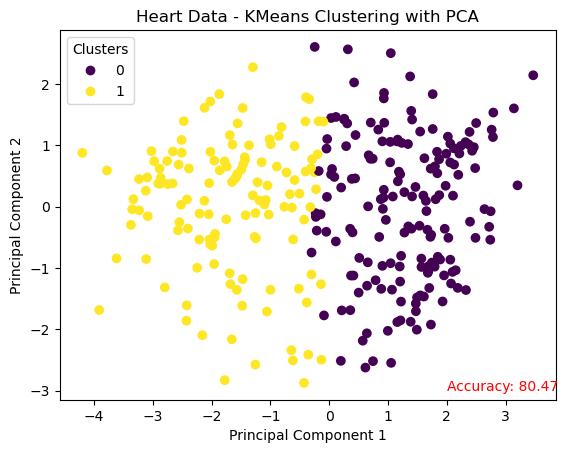

In [34]:
from numpy import unique 
from numpy import where 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt


data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)  

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"]

#x_train , x_test , y_train , y_test = train_test_split(test_size=0.3 , random_state= 47)
scalar = StandardScaler()  
x_scaled = scalar.fit_transform(x) 

pca = PCA(n_components = 2) 
x_pca = pca.fit_transform(x_scaled) 
kmeans = KMeans(n_clusters = 2 , random_state=42)
yhat = kmeans.fit_predict(x_scaled) 

confusion = confusion_matrix(y , yhat) 
accuracy = accuracy_score(y , yhat) 

print("Confusion Matrix" , confusion)
print ("Accuracy : " , accuracy) 

df['cluster'] = yhat 
scatter=plt.scatter(x_pca[:,0] , x_pca[:,1] , c=yhat, cmap='viridis') 

plt.xlabel("Principal Component 1") 
plt.ylabel("Principal Component 2")
plt.title("Heart Data - KMeans Clustering with PCA")
plt.legend(*scatter.legend_elements(), title="Clusters") 
plt.text(2, -3, f"Accuracy: {accuracy*100:.2f}", fontsize=10, color="red")
plt.show() 

Accuracy:  0.8502415458937198
Confusion Matrix : 
           pred 0   pred 1
Actyal 0       101      11
Actual 1        20      75


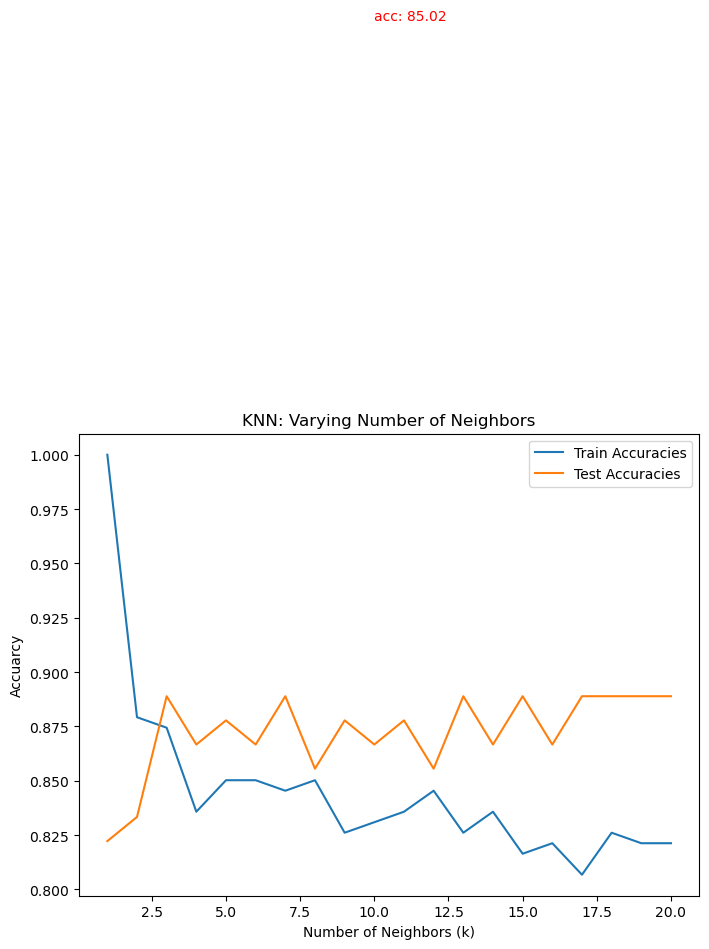

In [39]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)  

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"] 

x_train , x_test , y_train , y_test = train_test_split( x , y ,  test_size = 0.3 , random_state = 42 ,  stratify=y)

scaler = StandardScaler() 
x_train_s = scaler.fit_transform(x_train) 
x_test_s = scaler.transform(x_test) 

knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(x_train_s , y_train ) 
yht =knn.predict(x_train_s) 
acc = accuracy_score(y_train , yht)
confusion = confusion_matrix(y_train , yht) 
cm = pd.DataFrame(confusion , index = ["Actyal 0 " , "Actual 1 " ] , columns = ["pred 0 " , "pred 1"]) 
print(f"Accuracy: " , acc)
print("Confusion Matrix : ")
print(cm) 

neighbors = range(1,21) 
train_accuracies = {}
test_accuracies = {} 

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_s, y_train)
    train_accuracies[n] = knn.score(x_train_s, y_train)
    test_accuracies[n] = knn.score(x_test_s, y_test)

plt.figure(figsize = ( 8,6 )) 
plt.title("KNN: Varying Number of Neighbors") 
plt.plot (neighbors , train_accuracies.values() , label ="Train Accuracies" ) 
plt.plot (neighbors , test_accuracies.values() , label = "Test Accuracies")  
plt.legend() 

max_acc = max(max(train_accuracies.values()) , max(test_accuracies.values()))
plt.text(10, max_acc+0.2, f"acc: {acc*100:.2f}", fontsize=10, color="red")
plt.xlabel("Number of Neighbors (k)") 
plt.ylabel("Accuarcy") 
plt.show() 

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score , KFold , GridSearchCV, train_test_split 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)  

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"] 

x_train , x_test , y_train , y_test = train_test_split( x , y ,  test_size = 0.3 , random_state = 42 ,  stratify=y)

scaler = StandardScaler() 
x_train_s = scaler.fit_transform(x_train) 
x_test_s = scaler.transform(x_test) 

models = {
    "Regression " : LogisticRegression(max_iter=1000) ,
    "Random Forest " : RandomForestClassifier() , 
    "Gradient " : GradientBoostingClassifier() 
} 
print("____________________________________Cross Validation_____________________________________") 
for name , model in models.items() : 
    cv = cross_val_score ( model , x_train , y_train , cv = 5 , scoring = "accuracy") 
    print(f"{name} : Mean CV accuracy = {np.mean(cv)*100:.3f}%") 
print("______________________________________TEST_________________________________________________")
for name , model in models.items() :
    model.fit(x_train , y_train) 
    y_pred = model.predict(x_test) 
    acc =accuracy_score(y_test , y_pred) *100 
    print(f"{name} : Test Accuracy = {acc:.3f}%") 

____________________________________Cross Validation_____________________________________
Regression  : Mean CV accuracy = 81.661%
Random Forest  : Mean CV accuracy = 79.268%
Gradient  : Mean CV accuracy = 72.509%
______________________________________TEST_________________________________________________
Regression  : Test Accuracy = 88.889%
Random Forest  : Test Accuracy = 84.444%
Gradient  : Test Accuracy = 81.111%


Best grid params  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Grid best score  83.08943089430893
Test accuracy  85.55555555555556


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _ch

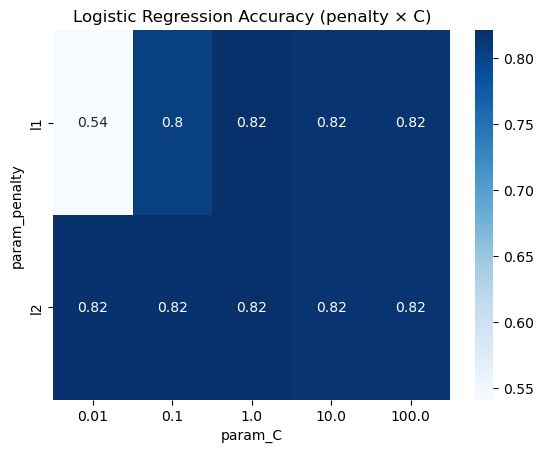

In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import  GridSearchCV, train_test_split 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

data = 'C:\\Users\\DELL\\Downloads\\processed_heart_data.csv'
df = pd.read_csv(data)  

df['num'] = df['num'].apply(lambda x:1 if x>0 else 0 ) 

x = df[["age", "sex", "thal", "exang", "ca", "oldpeak", "slope", "cp", "thalach"]]
y = df["num"] 

x_train , x_test , y_train , y_test = train_test_split( x , y ,  test_size = 0.3 , random_state = 42 ,  stratify=y)

scaler = StandardScaler() 
x_train_s = scaler.fit_transform(x_train) 
x_test_s = scaler.transform(x_test)  

param_grid = {
    "C" : [0.01 , 0.1 , 1 , 10 , 100] , 
    "penalty" : ["l1" , "l2" , "elasticnet" , "none"],
    "solver" : ["liblinear" , "saga"]
}

grid = GridSearchCV(LogisticRegression(max_iter=1000) , param_grid , cv = 5 , scoring = "accuracy" ) 
grid.fit(x_train_s , y_train) 

print("Best grid params " , grid.best_params_ ) 
print("Grid best score " , grid.best_score_ *100) 

best_model = grid.best_estimator_ 
y_pred = best_model.predict(x_test_s) 
print("Test accuracy " , accuracy_score(y_test , y_pred ) *100) 

pivot_table = results.pivot_table(values="mean_test_score", index="param_penalty", columns="param_C")

sns.heatmap(pivot_table, annot=True, cmap="Blues")
plt.title("Logistic Regression Accuracy (penalty × C)")
plt.show()